# Diabetes Case - Pima Indians: Supervised ML Classification

This notebook will explore the dataset, handle the missing values, standardize the numerical values and reduce the dimensionality of the feature space for pre-processing a real-world dataset and prepare for an supervised or unsupervised learning task. Then, we can utilize some classic supervised ML classification algorithm to predict either the patient is healthy or has a diabetes.

## OUTLINE: 

Data pre-processing, plotting and dimensionality reduction, classic ML classification, evaluation.

0. Library install
1. Reading the file
2. Train-test split
3. Imputer: simple, KNN, autoencoder
4. EDA: Plotting for Training Data
5. Dimensionality Reduction: PCA & MDS
6. Classification Task: Supervised
7. Result's Visualization

### *Library Install*

In [1]:
# these are the libraries that you will need throughout the assignment
import numpy as np 
import pandas as pd
import os

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, precision_recall_curve, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.metrics.pairwise import euclidean_distances


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS




RSEED = 8 # adjustable


## DATA PRE-PROCESSING: PLOTTING AND DIMENSIONALITY REDUCTION

The dataset comes from **Pima Indians Diabetes Database** that is publicly available and from UCI. However, some parts of the dataset were removed and changed. The original source is https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on specific diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The dataset consists of several medical predictors (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

According to the information on the data, it has eight attributes and one binary class. The brief explanation of the attributes are as follows:

- Pregnancies: Number of times pregnant.

- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.

- BloodPressure: Diastolic blood pressure (mm Hg).

- SkinThickness: Triceps skin fold thickness (mm).

- Insulin: 2-Hour serum insulin (mu U/ml).

- BMI: Body mass index (weight in kg/(height in m)^2).

- DiabetesPedigreeFunction: Diabetes pedigree function.

- Age: Age (years).

- and we have a binary class which can be 0 (healthy) or 1 (diabetes).

### *Reading the file*

In [2]:
DATA_DIR = "data/"
if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

# Download via Kaggle API if not already downloaded
if not os.path.exists(os.path.join(DATA_DIR, "diabetes.csv")):
    !kaggle datasets download -d uciml/pima-indians-diabetes-database -p data/ --unzip

#O ther options is to download the dataset manually on https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database and paste the .csv file in the folder

In [3]:
# Read the dataset

data = pd.read_csv("data/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# Check the information about the dataset:
data.info()

# The dataset seems not have non-null in all columns. It consists of:
# -. 1 categorical target variable named "Outcome" in int64 format
# -. 7 numerical predictor variables with 5 columns in int64 format and 2 columns float64 format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# See the dataset's descriptive statistics
data.iloc[:,:-1].describe()

# The "Outcome" variable is a categorical data, hence we shouldn't observe its descriptive statistics.
# At a glance, several data seems unreasonable. For instance: glucose, blood pressure, or BMI variables aren't possible to be zero.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


### *Train-test split* 

##### It seems like there is no null data encoded as such. However, there are many that might look strange (maybe some values that do not make sense?). Here are some 'missing' values (values that are encoded with values that do not make sense) per attribute, excluding the attributes 'Pregnancies', 'Outcome'.

##### `But, we need to split the data into train and test before imputation.`



In [6]:
# replace 0 with NaN before split
X = data.drop("Outcome", axis=1).copy()
y = data["Outcome"].copy

# convert y to series
y = data[["Outcome"]].squeeze()

                            0
Glucose                     5
BloodPressure              35
SkinThickness             227
Insulin                   374
BMI                        11
DiabetesPedigreeFunction    0
Age                         0


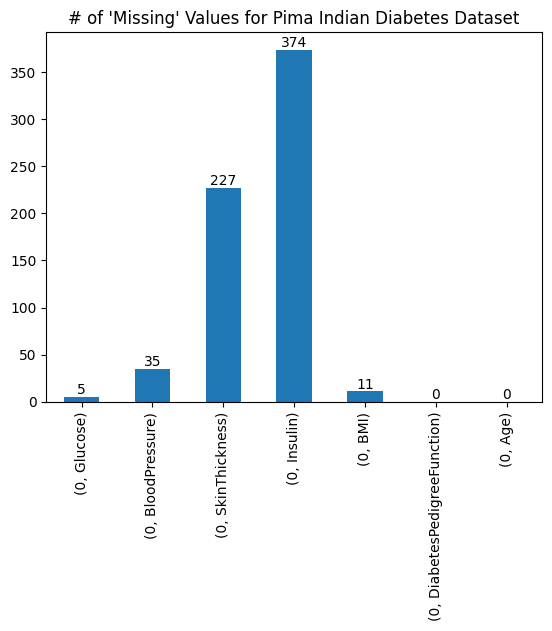

In [7]:
# Step 1: most probably, the 'missing' value is 0, since the dataset is about "normal case" diabetes patients.
# Therefore, the BMI, Glucose, and BloodPressure shouldn't be zero.
# Eliminating other values may affect us to lose many valuable features of the sickness indicators.
missing_value = {}
for i in data.columns[1:-1]: #the index here is to exclude the variable "Outcome" and "Pregnancies"
    missing_value[i] = (data[i] == 0).sum()

missing_value = pd.DataFrame.from_dict(missing_value, orient='index')
print(missing_value)

# Step 2: creating the plot
ax = missing_value.unstack().plot(kind='bar', stacked=True)
ax.set_title("# of 'Missing' Values for Pima Indian Diabetes Dataset")
ax.bar_label(ax.containers[0])

plt.show()


In [8]:
# Define columns where 0 means "missing"
cols_with_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

In [9]:
# Replace only in those columns
X[cols_with_missing] = X[cols_with_missing].replace(0, np.nan)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RSEED, stratify=y)

### *Imputer: simple, KNN, autoencoder*

#### *Imputation with scikit-learn & Autoencoder imputer*

##### [SimpleImputater](https://scikit-learn.org/stable/modules/impute.html): change some values into another reasonable value, such as mean. The only thing that can have zero value is the attribute **'Pregnancies'**.
##### [KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html): change some values into another reasonable value, based on neighbors; value. The only thing that can have zero value is the attribute **'Pregnancies'**.
##### [AutoEncoder](https://datascience.oneoffcoder.com/autoencoder-data-imputation.html)

In [11]:
def imputer(imputer, X_train, X_test):
    # Fit only on train
    X_train_imp = imputer.fit_transform(X_train)
    X_test_imp = imputer.transform(X_test)

    return X_train_imp, X_test_imp

In [12]:
#Scikitlearn

X_train_mean, X_test_mean = imputer(SimpleImputer(strategy="mean"), X_train, X_test)
X_train_knn, X_test_knn = imputer(KNNImputer(n_neighbors=5), X_train, X_test)

In [13]:
# Autoencoder

import torch
import torch.nn as nn
import torch.optim as optim

# Random seed for reproducibility
torch.manual_seed(RSEED)
np.random.seed(RSEED)

def to_tensor(df):
    data_tensor = torch.tensor(df.values, dtype=torch.float32)
    mask = ~torch.isnan(data_tensor)  # True where value exists
    data_tensor[~mask] = 0.0          # Replace NaN with 0 temporarily
    return data_tensor, mask

X_train_tensor, mask_train = to_tensor(X_train)
X_test_tensor, mask_test = to_tensor(X_test)


In [14]:
class Autoencoder(nn.Module):
    def __init__(self, n_features, hidden=16):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(n_features, hidden),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(hidden, n_features)
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

n_features = X_train.shape[1]
model = Autoencoder(n_features)

In [15]:
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss(reduction='none')  # we’ll mask manually

n_epochs = 500
for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    
    # Masked MSE: only consider observed values
    loss = (criterion(output, X_train_tensor) * mask_train).sum() / mask_train.sum()
    
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f"Epoch {epoch+1}/{n_epochs}, Loss: {loss.item():.4f}")

Epoch 100/500, Loss: 46.9806
Epoch 200/500, Loss: 17.9275
Epoch 300/500, Loss: 12.6141
Epoch 400/500, Loss: 8.4051
Epoch 500/500, Loss: 6.6177


In [16]:
model.eval()
with torch.no_grad():
    X_train_imputed = X_train_tensor.clone()
    X_train_imputed[~mask_train] = model(X_train_tensor)[~mask_train]

    X_test_imputed = X_test_tensor.clone()
    X_test_imputed[~mask_test] = model(X_test_tensor)[~mask_test]

# Convert back to numpy for sklearn
X_train_auto = X_train_imputed.numpy()
X_test_auto = X_test_imputed.numpy()

In [17]:
datasets = {
    "Mean": (X_train_mean, X_test_mean),
    "KNN": (X_train_knn, X_test_knn),
    "Autoencoder": (X_train_auto, X_test_auto)
}

#### *EDA: Plotting for Training Data*

##### For the visualization purposes, we use the KNNImputer result although at the end we'll find the GridSearch to find the best combination of both imputer and classification algorithm.

In [18]:
#KNNImputer
X_train_imp = pd.DataFrame(X_train_knn, columns=X_train.columns)
X_test_imp = pd.DataFrame(X_test_knn, columns=X_test.columns)

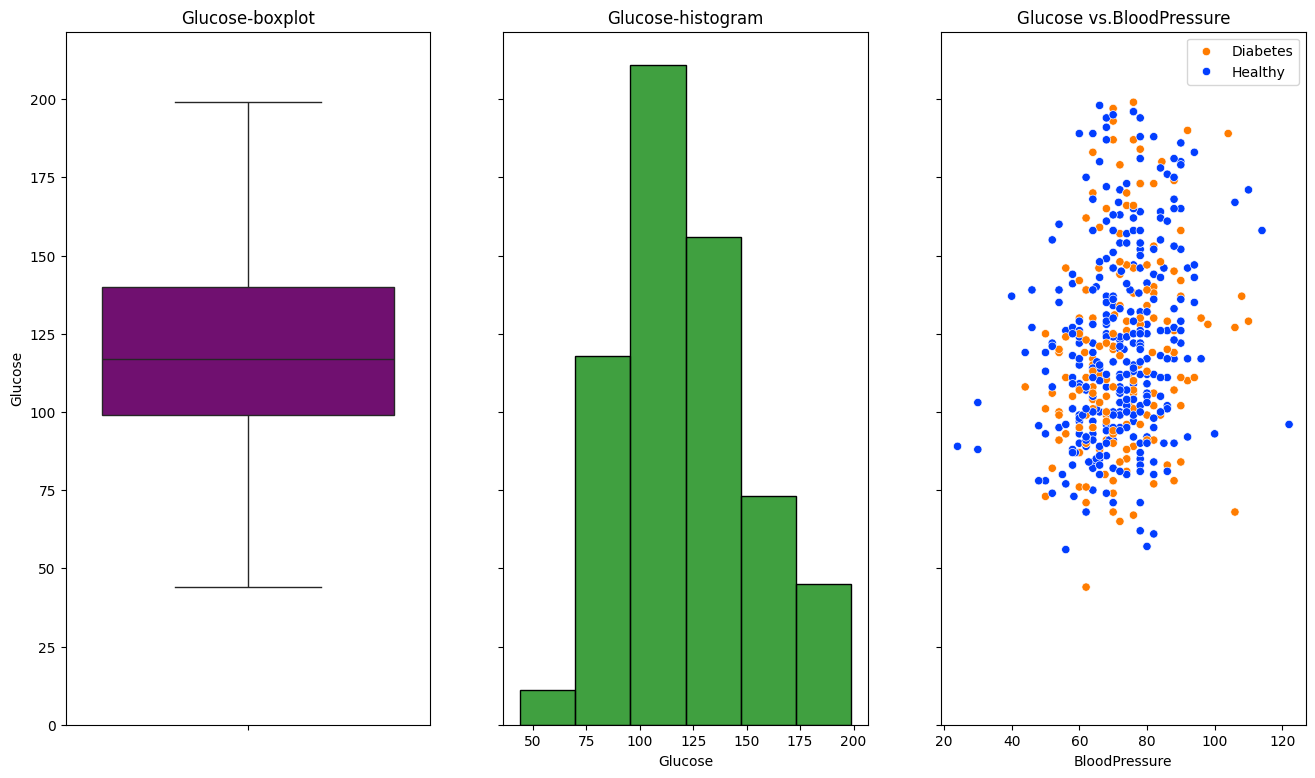

In [19]:
# Glucose

fig, ax = plt.subplots(1, 3, figsize=(16,9),sharey=True) #create 1 row with 3 plots

# A boxplot for the attribure 'Glucose'
sns.boxplot(ax=ax[0],data=X_train_imp['Glucose'],color='purple')
ax[0].set_title('Glucose-boxplot')

# A histogram for the attribure 'Glucose'
sns.histplot(ax=ax[1],data=X_train_imp['Glucose'], bins=6, color='green')
ax[1].set_title('Glucose-histogram')

# Scatterplot: Glucose vs. BloodPressure
sns.scatterplot(ax=ax[2],data=X_train_imp,y='Glucose',x='BloodPressure',hue=y_train,palette='bright')
ax[2].set_title('Glucose vs.BloodPressure')
ax[2].legend(['Diabetes','Healthy'])

# Showing the graph
plt.show()


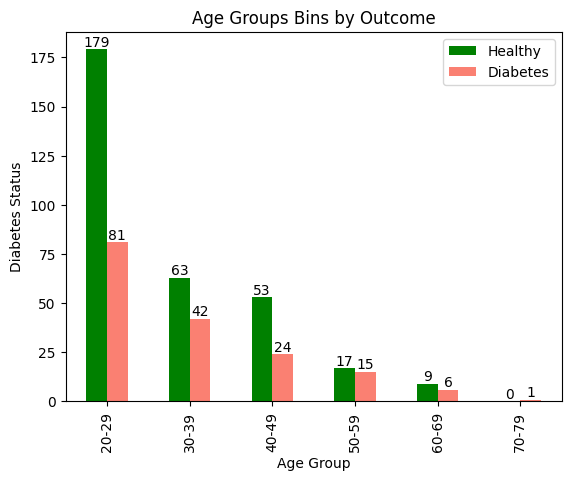

In [20]:
# Age groups to outcome

# Step 1: Divide the age column into the following age groups
bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]
labels = ["0-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-100"]
X_train_imp['age_bins'] = pd.cut(X_train_imp['Age'], bins=bins, labels=labels, right=False)

# Step 2: Create a plot
age_by_class = pd.crosstab(X_train_imp['age_bins'], y_train) # Because y_train is series

ax = age_by_class.plot(kind = 'bar', color = ['green','salmon'])
ax.set_title('Age Groups Bins by Outcome')
ax.set_xlabel('Age Group')
ax.set_ylabel('Diabetes Status')
ax.legend(['Healthy','Diabetes'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

#Step 3: restore the dataset
X_train_imp.drop('age_bins',axis=1,inplace=True)

Some multivariate questions are: <br>
1. Is there any collinearity between the predictor variables?<br>
Yes, there are:<br>
    (1) Age and Pregnancies: pregnancies need time and it will consequently affect the patient's age;<br>
    (2) Insulin and Glucose: not sure why;<br>
    (3) BMI and Skin Thickness: I didn't expect before. In fact, the BMI and skin thickness have positive relationship.<br>

<br>
2. Is there any variable that roughly can distinguish between diabetes and non diabetes patients?<br>
There are no exact patterns, however, glucose level seems to be a good predictor to distinguish patient with and without diabetes.<br> But, let's confirm this in the next step.<br>

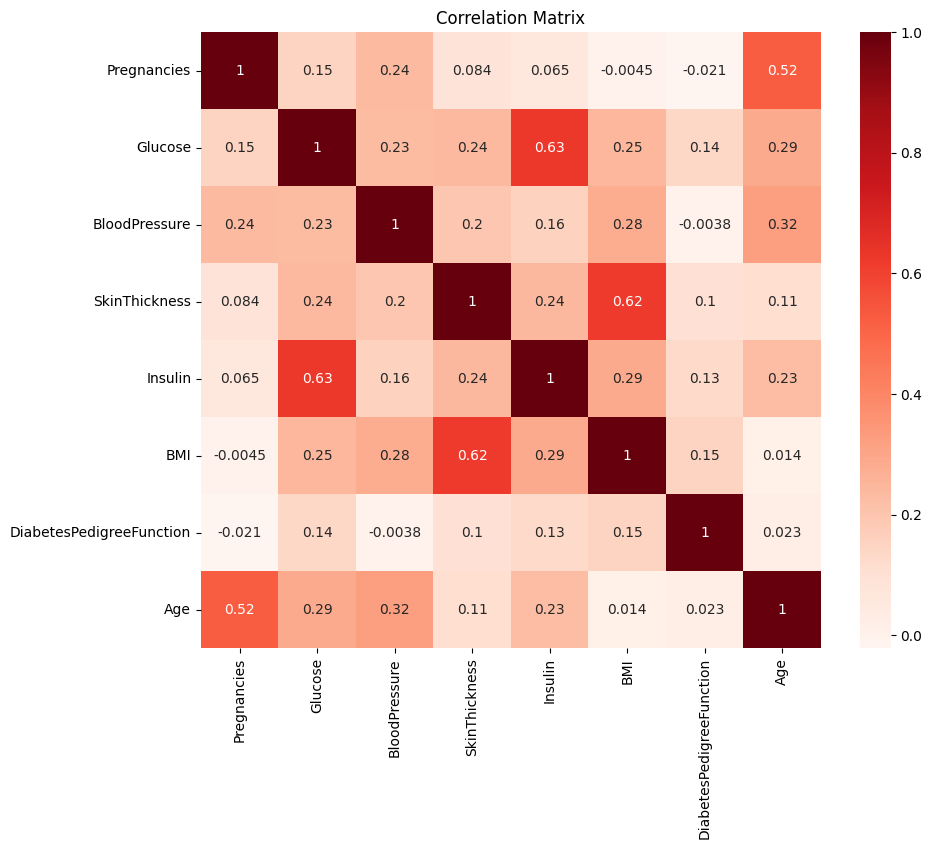

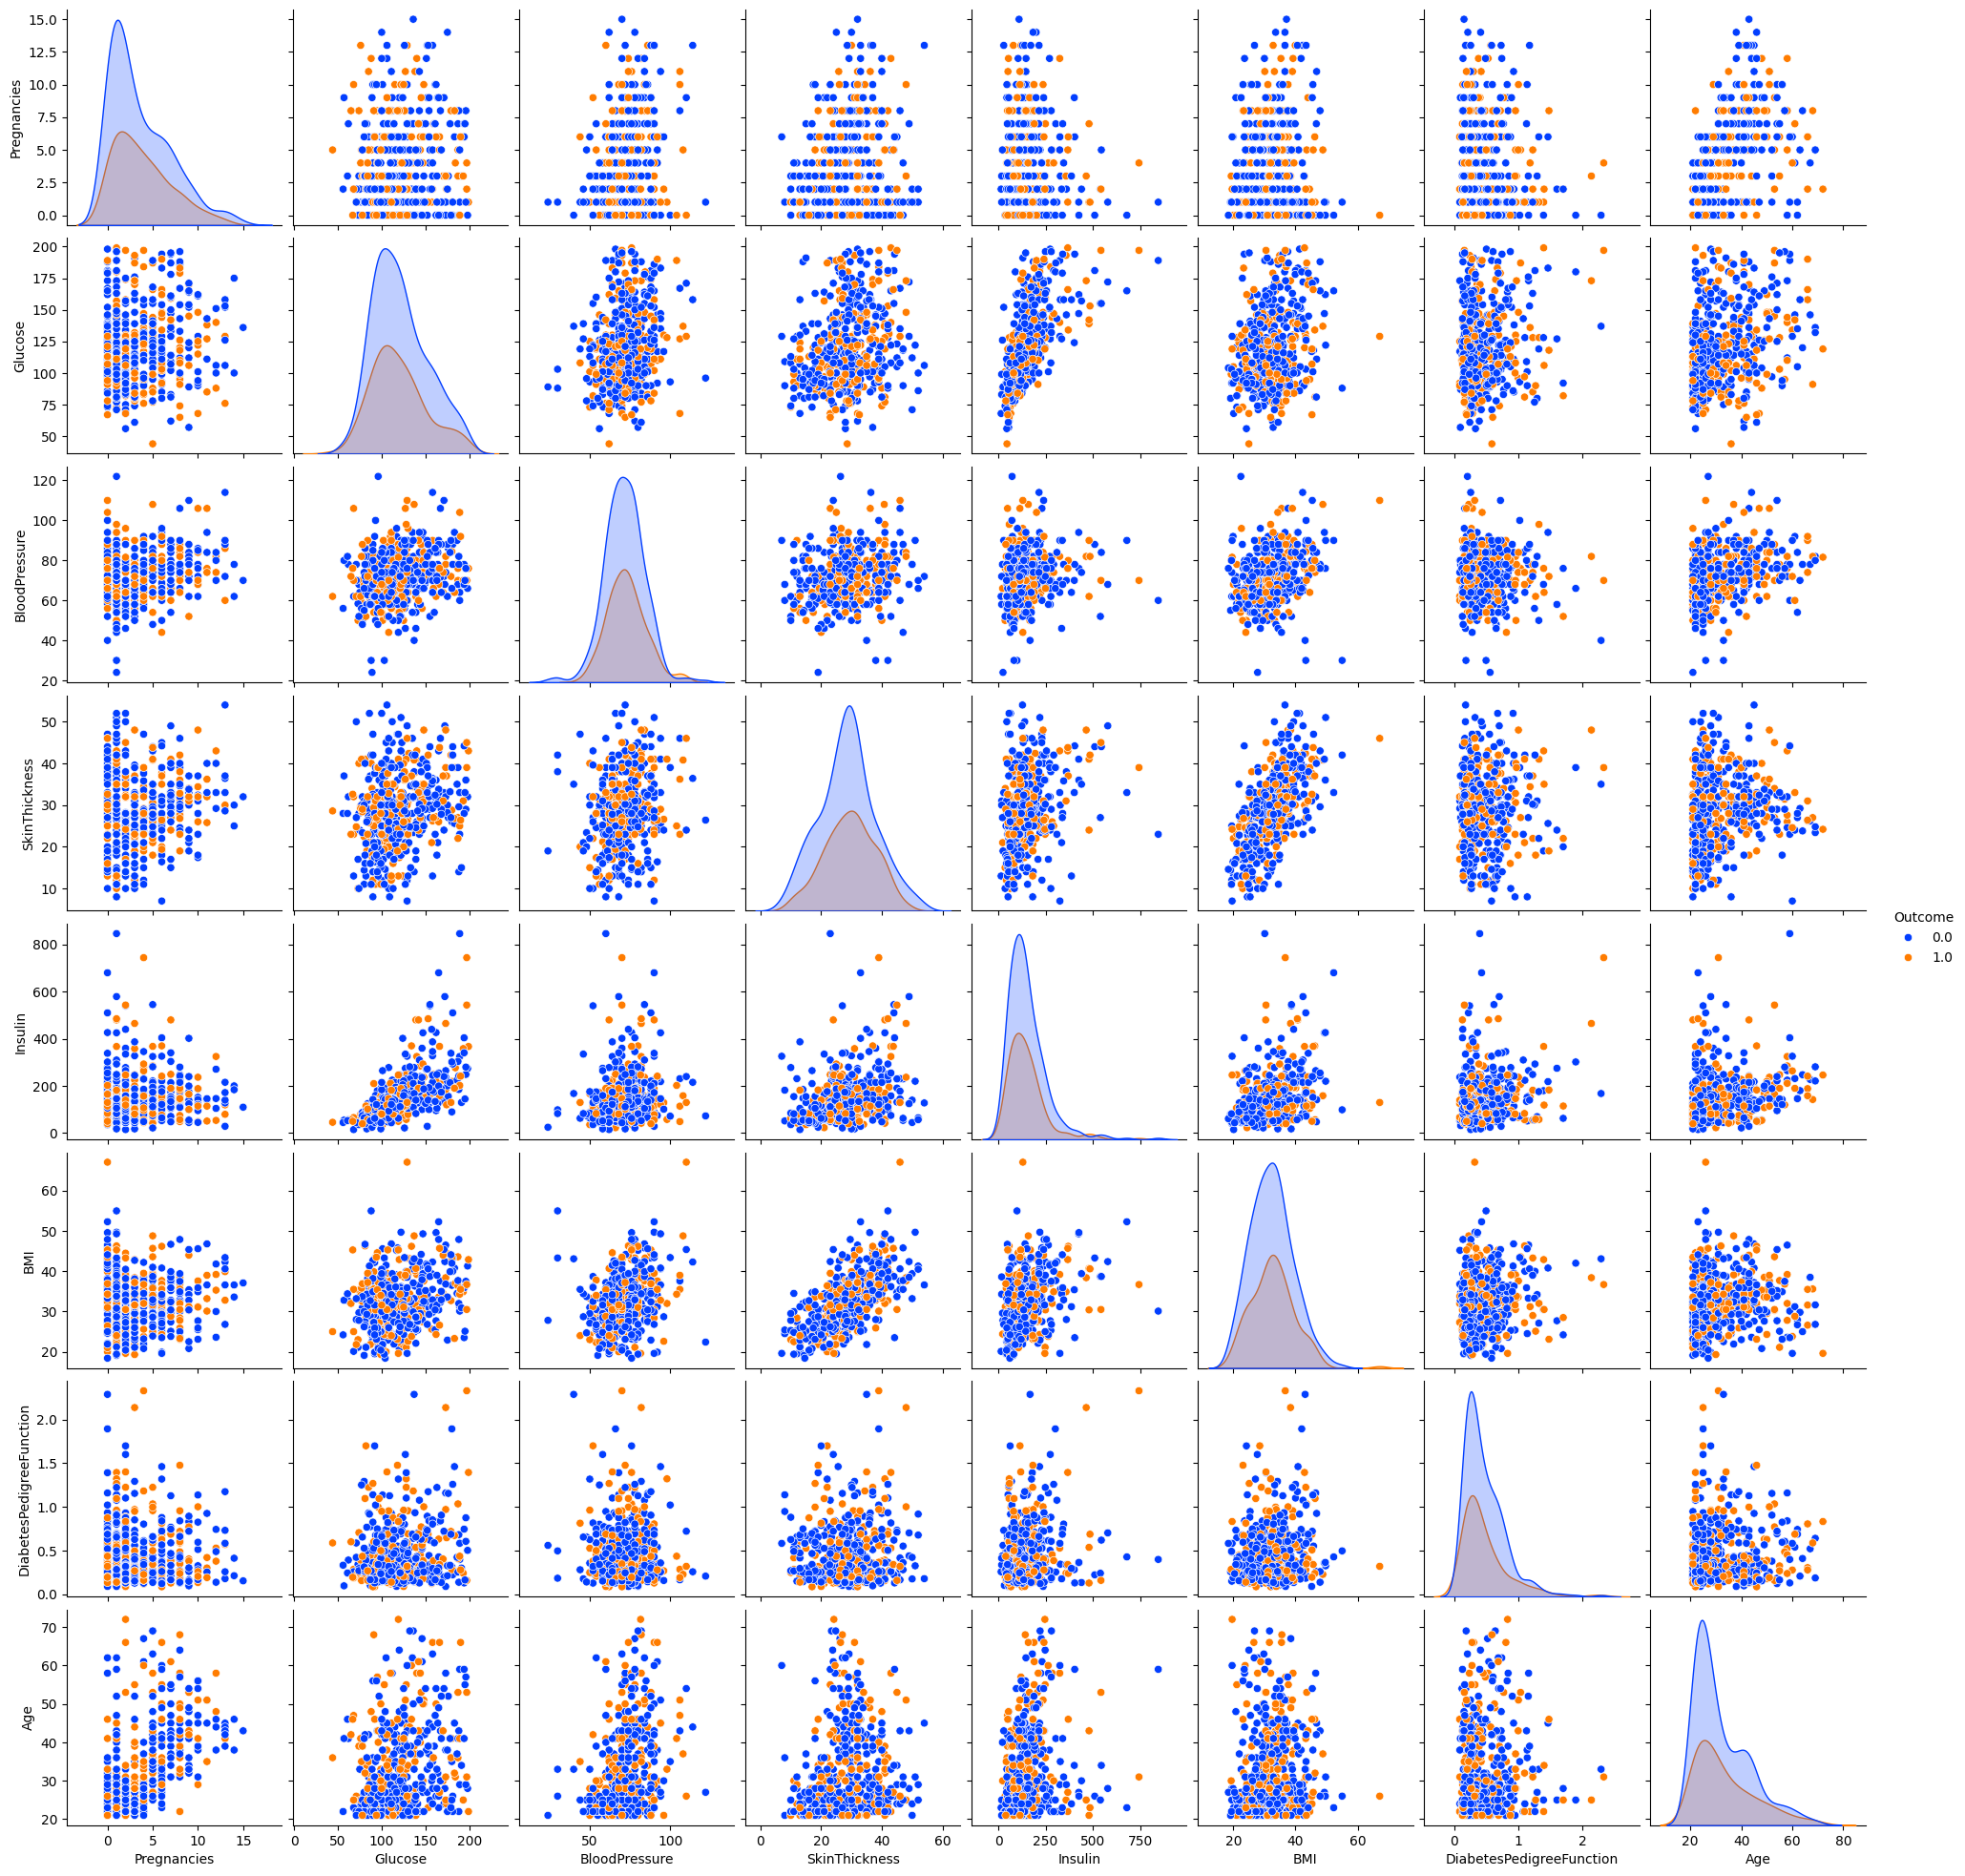

In [21]:
# Step 1: calculate correlation matrix
plt.figure(figsize=(10,8))
cor = X_train_imp.corr()

ax = sns.heatmap(data=cor, annot=True, cmap=plt.cm.Reds)
ax.set_title('Correlation Matrix')
plt.show()

# Step 2: create a pairplot to see if there's any linear relationship between variables.
import warnings
warnings.filterwarnings("ignore")

X_train_imp['Outcome'] = y_train
sns.pairplot(X_train_imp, hue='Outcome', height=2.5, palette='bright')

X_train_imp.drop('Outcome',axis=1,inplace=True)

#### *Dimensionality Reduction: PCA & MDS*

#### *PCA*

##### Since, there are too many parameters to see, we can perform dimensionality reduction. One of them is PCA, which selects the highest the data variance as the Principal Components.
##### The first step of PCA is Standardization, which transforms data to have a mean of zero and a standard deviation of 1. 

In [22]:
# Perform standardscaler and return the DataFrame
X_train_scaled = StandardScaler().fit_transform(X_train_imp)
X_train_standardized = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [23]:
# PCA

# Step 1: reduce the dimensionality of the standardized dataset to 2 Principal Components, with Principal Component analysis
pca = PCA(n_components=2,random_state=RSEED)
x_pca = pca.fit_transform(X_train_standardized)

# Step 2: Store the explained variance ratio in an array called explained_variance_ratio
explained_variance_ratio =  pca.explained_variance_ratio_

# Step 3: Store in a dataframe called df_principal_components, the result of pca's attribute components_
df_principal_components = pd.DataFrame(pca.components_,  columns=X_train.columns)


In [24]:
df_principal_components

# Interpretation: from here we see that Glucose is the most contributing attribute. 
# However, pregnancies could be a factor as we have known as gestational diabetes, which is temporary.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.247279,0.450783,0.341622,0.388068,0.426823,0.389116,0.140749,0.339036
1,0.563373,-0.014807,0.188691,-0.338480,-0.110393,-0.430222,-0.226157,0.532723


In [25]:
explained_variance_ratio

array([0.31673602, 0.18965022])

#### *Multi-Dimensional Scaling (MDS)*

Multidimensional scaling (MDS) seeks a low-dimensional representation of the data in which the distances respect well the distances in the original high-dimensional space.
In general, MDS is a technique used for analyzing similarity or dissimilarity data and it can help visualize the distances or dissimilarities between sets of objects. Examples of similarity or dissimilarity data might include the distance between pairs of cities, or planets at a particular point in time, or the similarity among groups of people (voters, patients etc). 

In these last two excercises we will apply Multi-Dimensional Scaling in our patient dataset using two different versions of the MDS sklearn algorithm. 

We will focus on the attribute **dissimilarity** of the MDS object. The attribute can be either 'euclidean' or 'precomputed'. In the former case the euclidean distance between the data points is computed by the algorithm, while in the latter case the user must themeselves compute the dissimilarities between data points and pass this to fit_transform.  

Please check the sklearn page for MDS to be able to implement the above tasks: [here](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html). Make sure how to use the parameters of fit_transform.


#####   `Apply MDS on the data_standardized with n_components=2 and dissimilarity='euclidean'. Plot the 2 resulting coordinates (in a scatterplot) with colors respective to the class labels.`

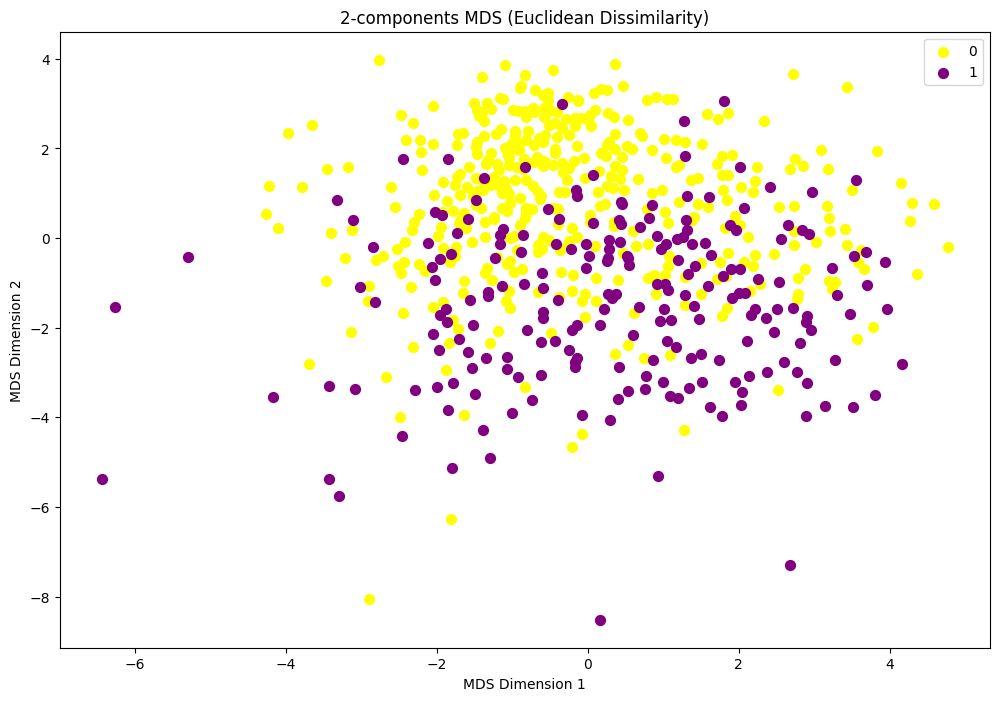

In [26]:
# Step 1: Initialize MDS with n_components = 2, random_state=8.
mds = MDS(n_components=2, dissimilarity='euclidean', random_state=RSEED)

# Step 2: Fit and transform the standardized dataset
X_2d_a = mds.fit_transform(X_train_standardized)

# Step 3: Plot the resulting reduced dataset with colors respective to the class (Outcome).
plt.figure(figsize = (12,8))
plt.scatter(X_2d_a[y_train == 0, 0], X_2d_a[y_train == 0, 1], c='yellow', s=50, label='0')
plt.scatter(X_2d_a[y_train == 1, 0], X_2d_a[y_train == 1, 1], c='purple', s=50, label='1')
plt.title('2-components MDS (Euclidean Dissimilarity)')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.legend(loc='upper right')
plt.show()

In [27]:
X_2d_a

array([[ 2.18297205,  1.01877262],
       [ 0.27132406, -0.44289638],
       [ 1.49834069, -0.55276384],
       ...,
       [ 1.95094131,  0.49276815],
       [-1.19259601,  1.17811175],
       [ 1.9977728 , -1.22142765]])

#### b. Multi-Dimensional Scaling using pairwise distances (euclidean)

##### `Compute the pairwise distances between observations using the euclidean metric. Apply MDS on the custom similarity matrix with n_components=2. Plot the results with colors respective to the class label. `

Note: the resulting plot should look similar with the previous one because it's talking the same context with different approaches.

distance shape : (614, 614)


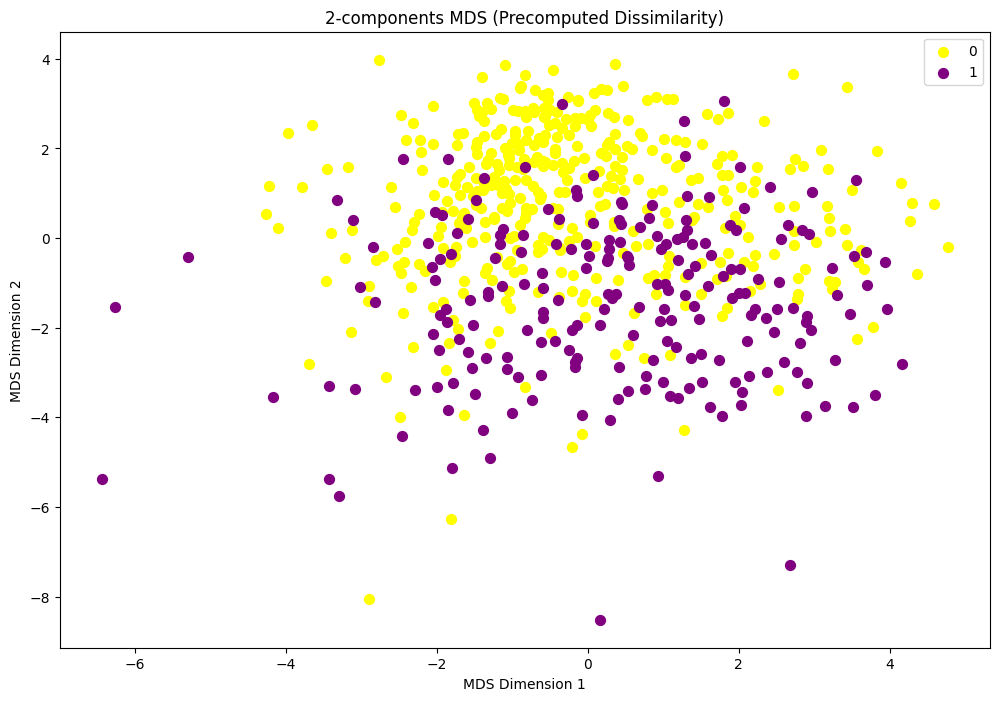

In [28]:
# Step 1: compute the pairwise distances between observations using the euclidean metric.
# One of the ways to do this is to use pdist and squareform from the scipy library (see [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html)) 
# or euclidean_distances from sklearn. In any case the returned array should be: distances ndarray of shape (n_samples_data_standardized, n_samples_data_standardized)

distances = euclidean_distances(X_train_standardized)
print('distance shape : ' + str(distances.shape))

# Step 2: create an MDS object with n_components=2, random_state=8, dissimilarity='precomputed'
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=8)

# Step 3: apply MDS on the constructed square distance matrix from step 1
X_2d_b = mds.fit_transform(distances)

# Step 4: plot the results in a scatterplot with colors respective to the class label
plt.figure(figsize = (12,8))
plt.scatter(X_2d_b[y_train == 0, 0], X_2d_b[y_train == 0, 1], c='yellow', s=50, label='0')
plt.scatter(X_2d_b[y_train == 1, 0], X_2d_b[y_train == 1, 1], c='purple', s=50, label='1')
plt.title('2-components MDS (Precomputed Dissimilarity)')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.legend(loc='upper right')
plt.show()

In [29]:
# Checking
try:
    np.testing.assert_allclose(X_2d_b, X_2d_a, atol=0.00001)
    print("result: equal")
except:
    print("result: not equal")


result: equal


#### *Classification Task: Supervised*

Evaluation function to choose the best combinations of imputer and classification algorithm:

In [30]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan
    
    return acc, f1, auc_score

We are using three algorithms to test which algorithms works best for our case.
1. Random Forest for *interpretability/insights*
2. SVM (with PCA) targeted for *maximum performance*: PCA and without PCA
3. Naive Bayes as a *baseline sanity* check.

Next, I will build a modular experiment runner that:
1. Takes each imputed dataset (mean, knn, auto).
2. Runs Random Forest, SVM (with and without PCA), and Naive Bayes.
3. Uses GridSearchCV to tune hyperparams.
4. Collects Accuracy, F1, ROC-AUC into a single results DataFrame.
(Optional) Plots ROC curves for the best models.

In [31]:
pipelines = {
    "RandomForest": Pipeline([
        ("scaler", StandardScaler()),  # not strictly needed, but harmless
        ("clf", RandomForestClassifier(random_state=RSEED))
    ]),
    "SVM": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC(probability=True, random_state=RSEED))
    ]),
    "SVM_PCA": Pipeline([
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=2)),
        ("clf", SVC(probability=True, random_state=RSEED))
    ]),
    "NaiveBayes": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", GaussianNB())
    ])
}

param_grids = {
    "RandomForest": {
        "clf__n_estimators": [100, 200],
        "clf__max_depth": [None, 5, 10]
    },
    "SVM": {
        "clf__C": [0.1, 1, 10],
        "clf__kernel": ["linear", "rbf"]
    },
    "SVM_PCA": {
        "pca__n_components": [2, 5, 10],
        "clf__C": [0.1, 1, 10],
        "clf__kernel": ["linear", "rbf"]
    },
    "NaiveBayes": {
        # NB usually has no hyperparams, but you can add var_smoothing if needed
        "clf__var_smoothing": [1e-9, 1e-8, 1e-7]
    }
}

In [32]:
results = []
best_models = {}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for data_name, (X_tr, X_te) in datasets.items():
    for model_name, pipeline in pipelines.items():
        print(f"Running {model_name} on {data_name} imputation.")
        
        grid = GridSearchCV(
            pipeline,
            param_grids[model_name],
            scoring="roc_auc",  # optimize for ROC-AUC
            cv=cv,
            n_jobs=-1
        )
        
        grid.fit(X_tr, y_train)
        best_models[(data_name, model_name)] = grid.best_estimator_
        
        acc, f1, auc_score = evaluate_model(grid.best_estimator_, X_te, y_test)
        
        results.append({
            "Dataset": data_name,
            "Model": model_name,
            "Best Params": grid.best_params_,
            "Accuracy": acc,
            "F1": f1,
            "ROC-AUC": auc_score
        })

Running RandomForest on Mean imputation.
Running SVM on Mean imputation.
Running SVM_PCA on Mean imputation.
Running NaiveBayes on Mean imputation.
Running RandomForest on KNN imputation.
Running SVM on KNN imputation.
Running SVM_PCA on KNN imputation.
Running NaiveBayes on KNN imputation.
Running RandomForest on Autoencoder imputation.
Running SVM on Autoencoder imputation.
Running SVM_PCA on Autoencoder imputation.
Running NaiveBayes on Autoencoder imputation.


In [33]:
results_df = pd.DataFrame(results)
print("\n=== Benchmark Results ===")
print(results_df.sort_values(by="ROC-AUC", ascending=False))

# Intepretations: The best ROC-AUC result is Random Forest with simple imputer Mean, followed by SVM with simple imputer Mean and no PCA.


=== Benchmark Results ===
        Dataset         Model  \
0          Mean  RandomForest   
1          Mean           SVM   
5           KNN           SVM   
8   Autoencoder  RandomForest   
4           KNN  RandomForest   
3          Mean    NaiveBayes   
7           KNN    NaiveBayes   
11  Autoencoder    NaiveBayes   
2          Mean       SVM_PCA   
10  Autoencoder       SVM_PCA   
6           KNN       SVM_PCA   
9   Autoencoder           SVM   

                                          Best Params  Accuracy        F1  \
0     {'clf__max_depth': 5, 'clf__n_estimators': 200}  0.727273  0.596154   
1            {'clf__C': 0.1, 'clf__kernel': 'linear'}  0.701299  0.530612   
5            {'clf__C': 0.1, 'clf__kernel': 'linear'}  0.714286  0.568627   
8     {'clf__max_depth': 5, 'clf__n_estimators': 100}  0.727273  0.596154   
4    {'clf__max_depth': 10, 'clf__n_estimators': 100}  0.733766  0.616822   
3                       {'clf__var_smoothing': 1e-09}  0.694805  0.584071   
7   

In [34]:
print("\n=== Benchmark Results ===")
print(results_df.sort_values(by="F1", ascending=False))

# Intepretations: The best F1-score result is Random Forest with KNN imputer, followed by Random Forest with simple imputer Mean.


=== Benchmark Results ===
        Dataset         Model  \
4           KNN  RandomForest   
0          Mean  RandomForest   
8   Autoencoder  RandomForest   
3          Mean    NaiveBayes   
7           KNN    NaiveBayes   
11  Autoencoder    NaiveBayes   
2          Mean       SVM_PCA   
5           KNN           SVM   
10  Autoencoder       SVM_PCA   
6           KNN       SVM_PCA   
1          Mean           SVM   
9   Autoencoder           SVM   

                                          Best Params  Accuracy        F1  \
4    {'clf__max_depth': 10, 'clf__n_estimators': 100}  0.733766  0.616822   
0     {'clf__max_depth': 5, 'clf__n_estimators': 200}  0.727273  0.596154   
8     {'clf__max_depth': 5, 'clf__n_estimators': 100}  0.727273  0.596154   
3                       {'clf__var_smoothing': 1e-09}  0.694805  0.584071   
7                       {'clf__var_smoothing': 1e-09}  0.694805  0.584071   
11                      {'clf__var_smoothing': 1e-09}  0.694805  0.576577   
2   

#### *Result's Visualization*

In [35]:
def plot_curves(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    y_proba = None
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:,1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_test)
    
    fig, axs = plt.subplots(1, 3, figsize=(18,5))
    
    # Confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs[0], cmap="Blues")
    axs[0].set_title(f"{title} — Confusion Matrix")
    
    if y_proba is not None:
        # ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc_val = auc(fpr, tpr)
        axs[1].plot(fpr, tpr, color="darkorange", lw=2, label=f"AUC = {roc_auc_val:.2f}")
        axs[1].plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
        axs[1].set_title(f"{title} — ROC Curve")
        axs[1].legend(loc="lower right")
        
        # Precision-Recall curve
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        pr_auc_val = auc(recall, precision)
        axs[2].plot(recall, precision, color="purple", lw=2, label=f"AUPRC = {pr_auc_val:.2f}")
        axs[2].set_title(f"{title} — Precision-Recall")
        axs[2].legend(loc="lower left")
    
    plt.show()


In [36]:
def plot_rf_importances(model, feature_names):
    importances = model.named_steps["clf"].feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(10,6))
    plt.bar(range(len(importances)), importances[indices], align="center")
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
    plt.title("Random Forest Feature Importances")
    plt.show()

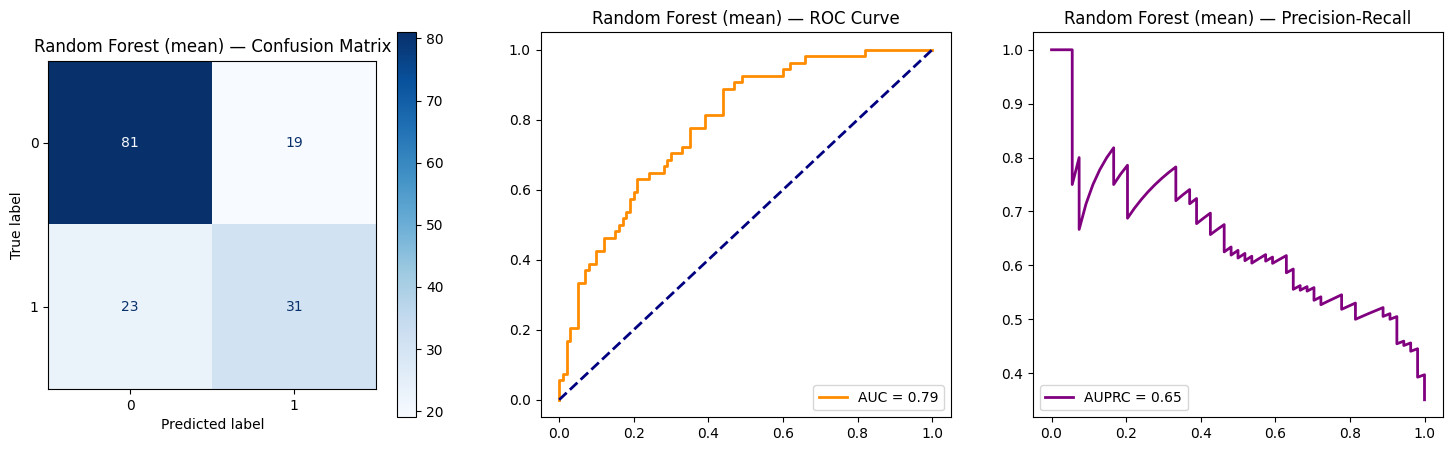

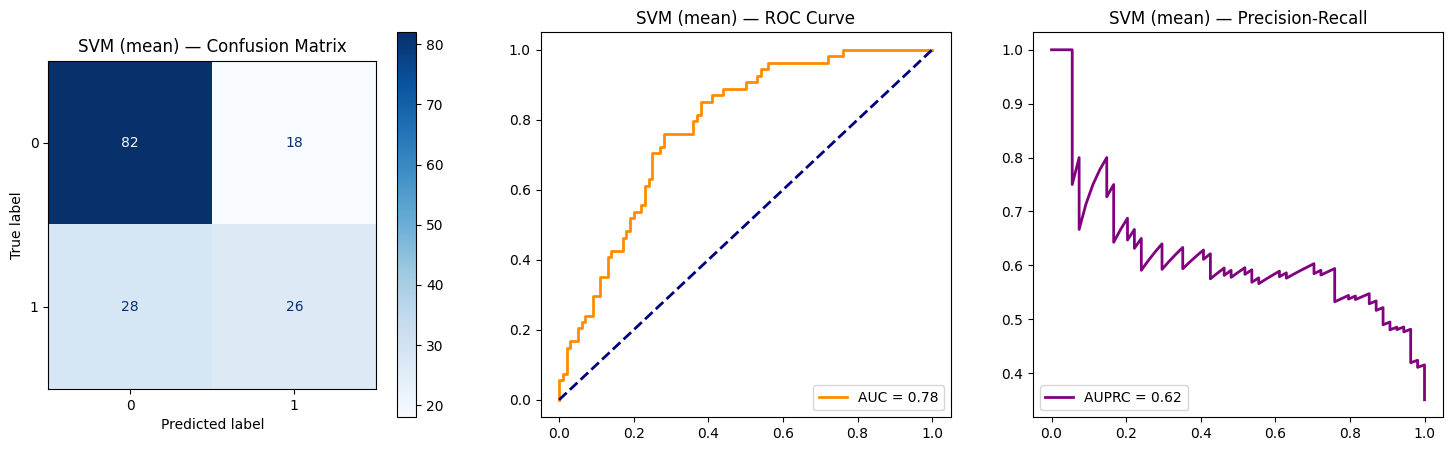

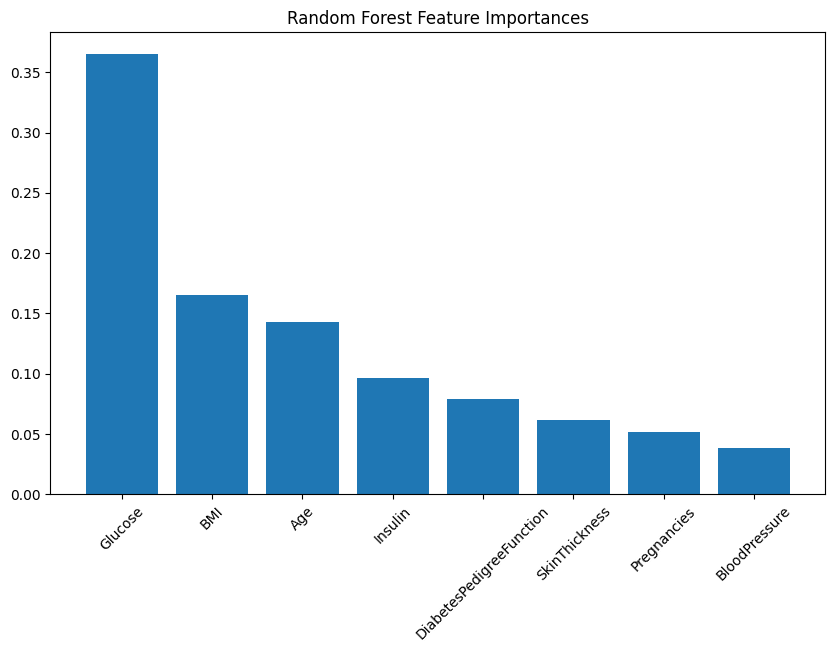

In [37]:
best_rf = best_models[("Mean", "RandomForest")]  # 1st winner
best_svm = best_models[("Mean", "SVM")]  # 2nd winner

# ROC + PR curves
plot_curves(best_rf, X_test_mean, y_test, "Random Forest (mean)")
plot_curves(best_svm, X_test_mean, y_test, "SVM (mean)")

# RF interpretability
plot_rf_importances(best_rf, feature_names=X_train.columns)

# Intepretation: it confirms what we see in EDA that Glucose is the most contributing factors to separate target class 0 and 1.
